<a href="https://colab.research.google.com/github/amanullahshah32/Deep-Learning/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in PyTorch

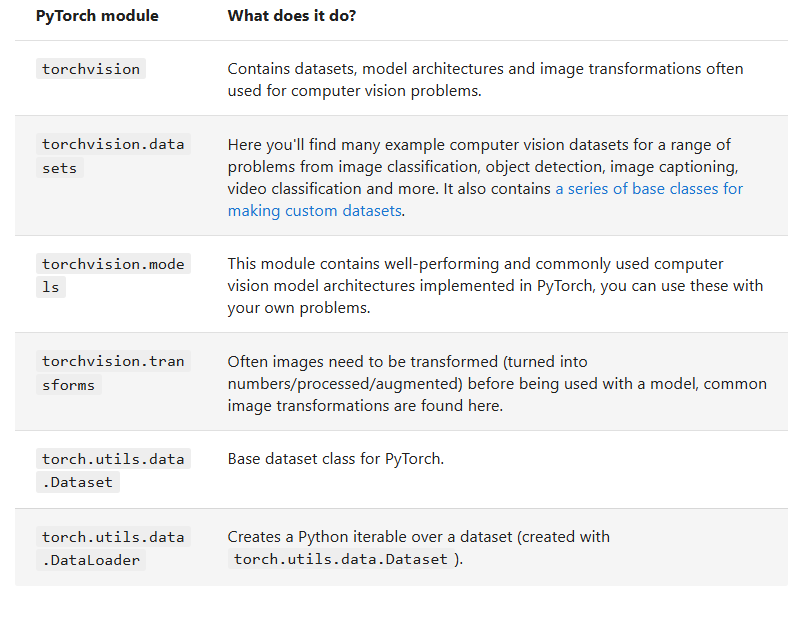

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from  torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib as plt

# check versions:
print(f"PyTorch verison: {torch.__version__}")
print(f"TorchVision version: {torchvision.__version__}")

PyTorch verison: 2.4.0+cu121
TorchVision version: 0.19.0+cu121


## 1. Getting a dataset


In [2]:
# Setup training data
train_data = datasets.FashionMNIST(root='data', # where to download
                                   train = True, # get training data
                                   download= True, # donwload data if it doesn't exist on disk
                                   transform = ToTensor(), # images come as PIL format, we want to turn it into tensors
                                   target_transform = None # You can transform labels as well
                                   )

# Setup testing data
test_data = datasets.FashionMNIST(
    root='data',
    train=True, # get the test data
    download= False,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10652314.54it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 168567.39it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3104604.52it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22123234.62it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# see first training sample

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).



In [4]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [5]:
torch.cuda.is_available()

True

The order of our current tensor is often referred to as CHW (Color Channels, Height, Width).

There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last).

Note: You'll also see NCHW and NHWC formats where N stands for number of images. For example if you have a batch_size=32, your tensor shape may be [32, 1, 28, 28]. We'll cover batch sizes later.

In [6]:
# how many samples are there
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 60000, 60000)

In [7]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 Visualizing our data


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

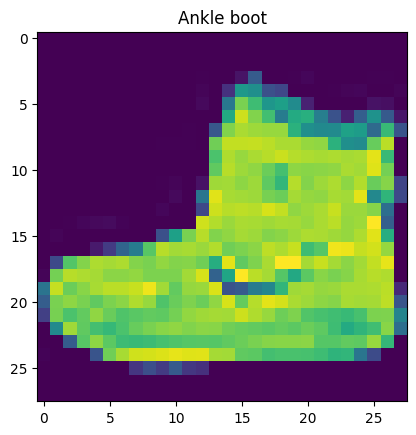

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is 1,28,28
plt.title(class_names[label])

we can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`

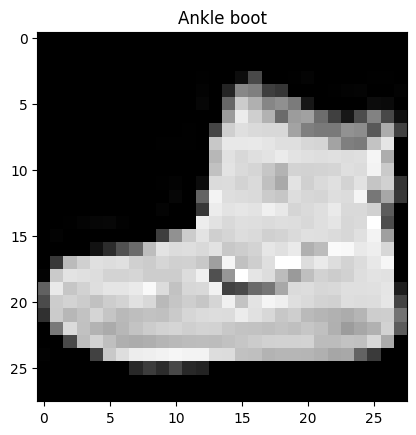

In [9]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

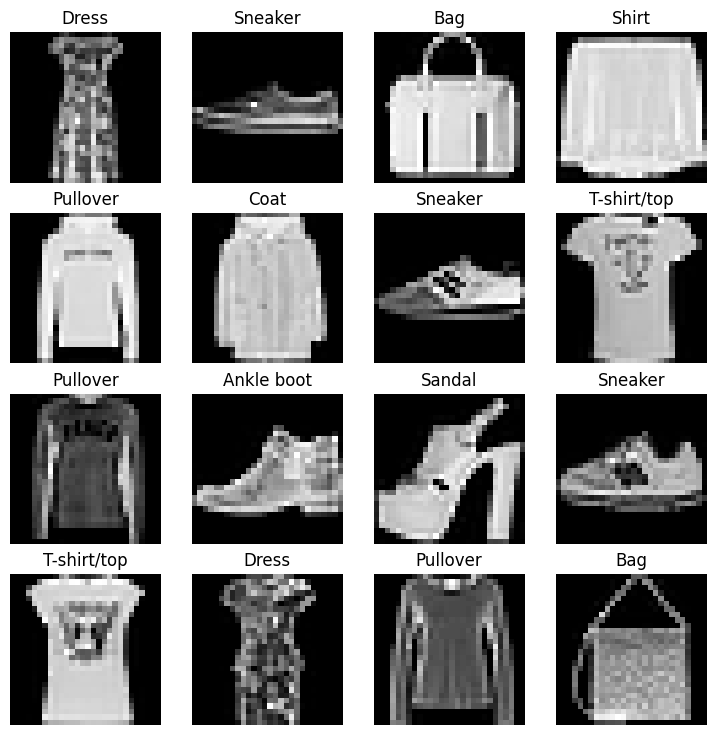

In [10]:
# Plot more images
torch.manual_seed(4)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data) , size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare dataloader

Let's create dataloader's for our training and test sets

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,  # dataset to turn into iterables
                              batch_size= BATCH_SIZE, # how many samples per batch
                              shuffle = True # shuffle data every epoch
                              )
test_dataloader = DataLoader(test_data,
                             batch_size = 32,
                             shuffle = False) # dont necessarily have to shuffle the testing data

# let's check out whats we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test Dataloader: {len(test_dataloader)} batcher os {32}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a531192ff10>, <torch.utils.data.dataloader.DataLoader object at 0x7a531192ed10>)
Length of train_dataloader: 1875 batches of 32
Length of test Dataloader: 1875 batcher os 32


In [12]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Imaze size: torch.Size([1, 28, 28])
label: 0, label_size: torch.Size([])


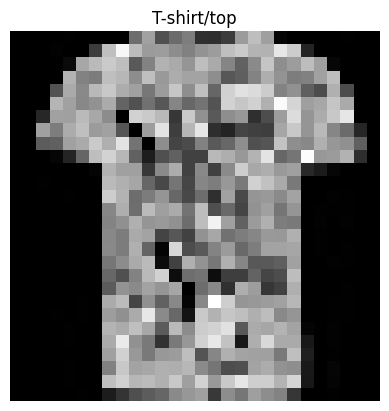

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Imaze size: {img.shape}")
print(f"label: {label}, label_size: {label.shape}")

## 3. Model 0: Build a baseline model

In [14]:
# create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x= train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what's happening
print(f"shape before flattening: {x.shape} [color channel, height , width]")
print(f"Shape after flattening: {output.shape}")

# #Try uncommenting below and see what happens
# print(f"x:{x}\n\n")
# print(output)

shape before flattening: torch.Size([1, 28, 28]) [color channel, height , width]
Shape after flattening: torch.Size([1, 784])


Let's create our first model using nn.Flatten() as the first layer.

In [15]:
from torch import nn
class FasionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their inputs iin vector form
        nn.Linear(in_features = input_shape, out_features = hidden_units), # in_features = number of features in a data sample (784 pixels)
        nn.Linear(in_features = hidden_units, out_features = output_shape)

        )

  def forward(self, x):
    return self.layer_stack(x)


In [16]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FasionMNISTModelV0(input_shape = 784, # one for every pixel (28*28)
                              hidden_units= 10, # how many units in the hidden layers
                              output_shape=len(class_names)) # one for every class

model_0.to('cpu') ## Keep model on cpu to begin with

FasionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [18]:
model_0.parameters()

<generator object Module.parameters at 0x7a5311846260>

### 3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our helper_functions.py script and subsequently the accuracy_fn() we defined in notebook 02.



In [19]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [20]:
# Import accuracy metric
from helper_functions import accuracy_fn # note: could also use torchmetrics.accuracy (task = 'multiclass', num_classes=len(class_names)).to(device)


In [21]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also claeed "criterion/cost" function in some places
optimizer = torch.optim.SGD(params = model_0.parameters() , lr =0.1)

### 3.2 Creating a funciton to time our experiments

In [22]:
# torch.device()

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """ Prints difference between start and end time.

  Args:
    start (float): start time of computation (preferred in timeit format).
    end (float): end time of computation
    device ([type], optional): device that compute is running on. Defaults to None.

  Returns:
    float: time between start and end in seconds (higher is longer).
  """

  total_time = end - start
  print(f"train time on {device} : {total_time:.3f} seconds")
  return total_time

### 3.3 Creating a training loop and training a model on batches of data

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create trianing and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n ------- \n")
  ### Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples")


  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)


  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X)

      # 2. Calculate the loss (accumatively)
      test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

      # 3. Calculate accuracy ( preds need to be same as y_true)
      test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim=1))

    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)

    # divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)

  # Prin out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test_loss: {test_loss:.5f} | Test_acc:{test_acc:.2f} \n \n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 ------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.59039 | Test_loss: 0.47426 | Test_acc:83.31 
 

Epoch: 1 
 ------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.47633 | Test_loss: 0.43953 | Test_acc:84.63 
 

Epoch: 2 
 ------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.45503 | Test_loss: 0.43026 | Test_acc:84.94 
 

train time on cpu : 44.071 seconds


In [25]:
torch.cuda.is_available()

True

In [26]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model_0.to(device)


In [27]:
# # Import tqdm for progress bar
# from tqdm.auto import tqdm

# # set the seed and start the timer
# torch.manual_seed(42)
# train_time_start_on_cpu = timer()

# # Set the number of epochs (we'll keep this small for faster training times)
# epochs = 3

# # Create trianing and testing loop
# for epoch in tqdm(range(epochs)):
#   print(f"Epoch: {epoch} \n ------- \n")
#   ### Training
#   train_loss = 0
#   # Add a loop to loop through training batches
#   for batch, (X,y) in enumerate(train_dataloader):
#     X, y = X.to(device), y.to(device)
#     model_0.train()
#     # 1. Forward pass
#     y_pred = model_0(X)

#     # 2. Calculate the loss (per batch)
#     loss = loss_fn(y_pred, y)
#     train_loss += loss # accumulatively add up the loss per epoch

#     # 3. Optimizer zero grad
#     optimizer.zero_grad()

#     # 4. Loss backward
#     loss.backward()

#     # 5. Optimizer step
#     optimizer.step()

#     # Print out how many samples have been seen
#     if batch % 400 == 0:
#       print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples")


#   # Divide total train loss by length of train dataloader (average loss per batch per epoch)
#   train_loss /= len(train_dataloader)


#   ### Testing
#   # Setup variables for accumulatively adding up loss and accuracy
#   test_loss, test_acc = 0,0
#   model_0.eval()
#   with torch.inference_mode():
#     for X,y in test_dataloader:
#       X, y = X.to(device), y.to(device)
#       # 1. Forward pass
#       test_pred = model_0(X)

#       # 2. Calculate the loss (accumatively)
#       test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

#       # 3. Calculate accuracy ( preds need to be same as y_true)
#       test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim=1))

#     # Calculations on test metrics need to happen inside torch.inference_mode()
#     # Divide total test loss by length of test dataloader (per batch)
#     test_loss /= len(test_dataloader)

#     # divide total accuracy by length of test dataloader (per batch)
#     test_acc /= len(test_dataloader)

#   # Prin out what's happening
#   print(f"\nTrain loss: {train_loss:.5f} | Test_loss: {test_loss:.5f} | Test_acc:{test_acc:.2f} \n \n")

# # Calculate training time
# train_time_end_on_cpu = timer()
# total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
#                                            end=train_time_end_on_cpu,
#                                            device=str(next(model_0.parameters()).device))



## 4. Make predictions and get model 0 results

In [28]:
import torch
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
   ## nicher part gulon bujhi nai ekhno.
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn, device= device
)
model_0_results

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.4302613139152527,
 'model_acc': 84.94166666666666}

## 5. Setup device agnostic code (for using a GPU if there is one)

In [30]:
# Setup device agnostic code

import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model: 1 - Building a better model with non-linearity

In [31]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten input into single vector
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.tensor):
    return self.layer_stack(x)

In [32]:
torch.manual_seed(42)
model_1= FashionMNISTModelV1(input_shape = 784, # number of input features
                             hidden_units = 10,
                             output_shape = len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device


device(type='cuda', index=0)

Using next: Efficiently checks the device of the first parameter in the model.

In [33]:
for param in model_1.parameters():
    print(param.device)



cuda:0
cuda:0
cuda:0
cuda:0


In [34]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

### 6.1 Setup loss, optimizer and evaluation metrics

In [35]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr= 0.1)

### 6.2 Functionizing training and test loops

this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call .to(device) on our feature (X) and target (y) tensors.

For the training loop we'll create a function called train_step() which takes in a model, a DataLoader a loss function and an optimizer.

In [36]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  train_loss, train_acc = 0,0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader):
    # send data to GPU
    X,y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model(X)

    # Calculate the loss:
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1)) # go from logits -> pred labels

    # Optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  #Calculate loss and accuracy per epoch and print out what's happening:
  train_loss /=len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:5f} \/ Train accuracy: {train_acc: 5f}")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              #optimizer: torch.optim.Optimizer,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval() # put model in eval mode
  # Turn on inference context manage
  with torch.inference_mode():
    for X,y in data_loader:

      # send data to GPU if available
      X,y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true= y, y_pred = test_pred.argmax(dim=1)) # go from logits -> pred labels


    # Adjust metrics and print out
    test_loss /=len(data_loader)
    test_acc /=len(data_loader)

    print(f"Test Loss: {test_loss: 5f} \/ Test acc: {test_acc: 5f}")

In [37]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.091992 \/ Train accuracy:  61.343333
Test Loss:  0.927273 \/ Test acc:  66.005000
Epoch: 1
---------
Train Loss: 0.781006 \/ Train accuracy:  71.928333
Test Loss:  0.687518 \/ Test acc:  75.195000
Epoch: 2
---------
Train Loss: 0.670271 \/ Train accuracy:  75.936667
Test Loss:  0.643019 \/ Test acc:  76.428333
train time on cuda : 46.668 seconds


In [38]:
# torch.manual_seed(42)

# # Note: This will error due to eval_mode() not using the device agnostic code
# model_1_results = eval_model(model = model_1,
#                              data_loader = test_dataloader,
#                              loss_fn= loss_fn,
#                              accuracy_fn = accuracy_fn,
#                              device = device)

# model_1_results

In [39]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.643019437789917,
 'model_acc': 76.42833333333333}

## 7. Model:2 Building a Convolutional Neural Network *(CNN)*

The CNN model we're going to be using is known as TinyVGG from the CNN Explainer website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of ``[Convolutional layer -> activation layer -> pooling layer]`` can be upscaled and repeated multiple times, depending on requirements.

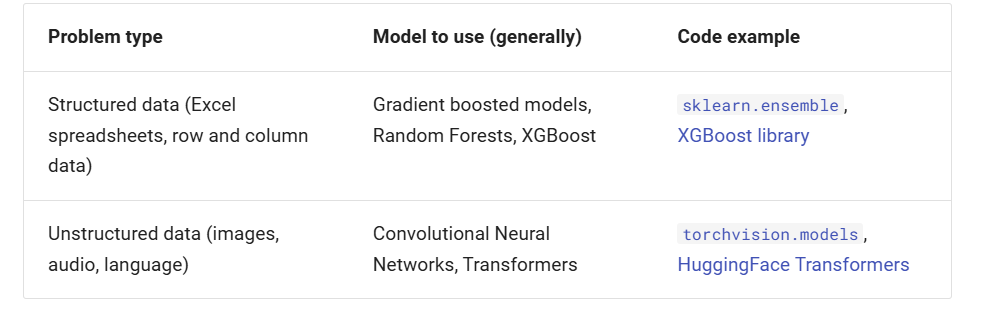

In [40]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,  # how big is the square that's going over the image
                  stride =1 , # default
                  padding = 1) , # options = 'valid' ( no padding)  or 'same' (output has same shape as input) or int for specific number
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # default stride value is same as kernel_size
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # where did this in_features shape come from?
        # it's because each layer of our neural network compresses and changes shape of our inputs data.
        nn.Linear(in_features = hidden_units * 7* 7,
                  out_features = output_shape)

    )
  def  forward(self, x:torch.Tensor):
    x = self.block_1(x)
    print(x.shape)
    x= self.block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return X

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

model_2




FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### **7.1 Stepping through** `nn.Conv2d()`

we could start using our model above and see what happens but let's first step through the two new layers we've added:

* `nn.Conv2d()`, also known as a convolutional layer
* `nn.MaxPool2s()` , also known as a max pooling layer

In [42]:
torch.manual_seed(42)

# Create sample batch of random number with same size as image batch
images = torch.randn(size= (32, 3, 64, 64)) # [batch size, color_chnnel, height, width]
test_images = images[0] # get a single image for testing

print(f"Image batch shape: {images.shape} -> [batch size, color_channels, height, width]")
print(f"Single image shape: {test_images.shape} -> [color_channels, height, width]")
print(f"single image pixel values: \n{test_images}")
print(f"single image shape: \n{test_images.shape}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
single image pixel values: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609

Let's create an example nn.Conv2d() with various parameters:
* in_channels(int) Number of channels in the input image
* out_channels(int) number of channels produced by the convolution
* kernel_size (int or tuple) size of the convolving kernel/filter
* stride (int or tuple, optional) how big of a step the convolving kernel takes at a time. Default: 1.
* padding ( int, tuple, str) - Padding added to all four sides of input. Default: 0.

https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif